In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

**Дата аугментация** используется для создания новых, измененных версий существующих изображений, что помогает увеличить разнообразие тренировочных данных. Это позволяет улучшить обобщающую способность модели, снижая риск переобучения, поскольку модель обучается на более разнообразных примерах. Аугментация также помогает повысить устойчивость модели к различным вариациям изображений, таким как изменения в ориентации, масштабе или освещении. В результате модель становится более гибкой и способной к лучшей классификации на ранее не встреченных данных.

In [2]:
mnist = keras.datasets.mnist
(x_train,y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train_reshaped = x_train.reshape(-1,28,28,1)
x_test_reshaped = x_test.reshape(-1,28,28,1)

# **Это наши "нормальные данные".**

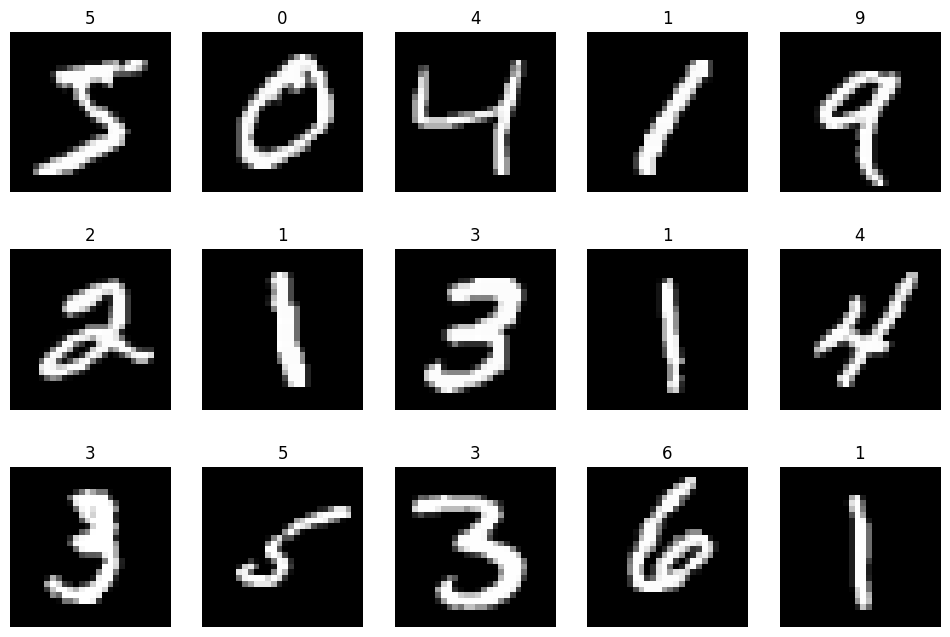

In [3]:
plt.figure(figsize=(12,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i] ,cmap = "gray")
  plt.title(y_train[i])
  plt.axis("off")
plt.show()

# Тут мы создаем наш первый **ImageGenerator**

Мы использовали **rotation_range**.Его суть в том что бы поворачивать наши фото от -n до n градусов.n - мы сами обозночаем

In [60]:
data_gen = ImageDataGenerator(rotation_range = 180)

In [61]:
data_gen.fit(x_train_reshaped[:64])

In [62]:
augmented_images = data_gen.flow(x_train_reshaped[:64] , batch_size=64)

In [63]:
augmented_image_batch = next(augmented_images)

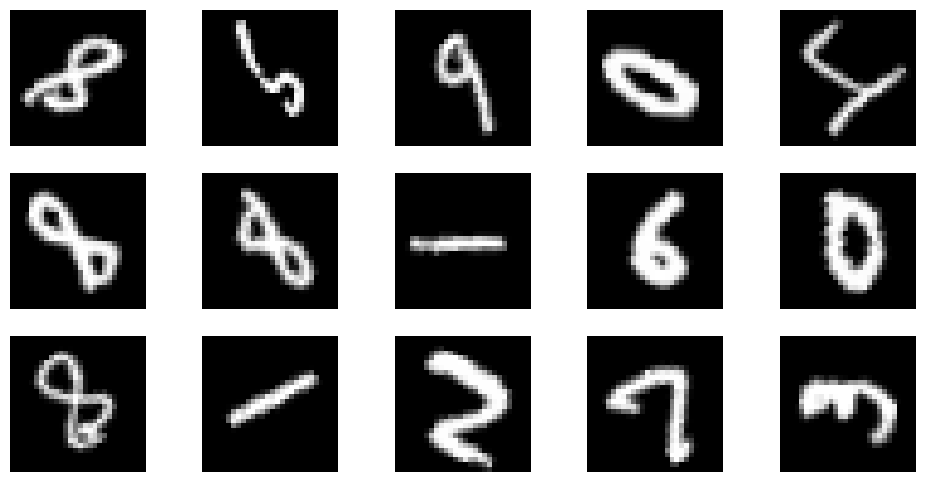

In [64]:
plt.figure(figsize=(12,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(augmented_image_batch[i].reshape(28,28) , cmap = "gray")
  plt.axis("off")
plt.show()

Тут мы немного скомбинировали **rotation_range** и **zoom_range**.Мы знаем то такое rotation_range, давайте про zoom_range поговорим , это то что насколько мы увеличиваем или уменьшаем фото(работает как обычный зум).

In [65]:
data2_gen = ImageDataGenerator(zoom_range = 0.5 , rotation_range = 100)
data2_gen.fit(x_train_reshaped[:64])
augmented_image = data2_gen.flow(x_train_reshaped[:64] , batch_size = 64)

In [66]:
augmented_image_batch = next(augmented_image)

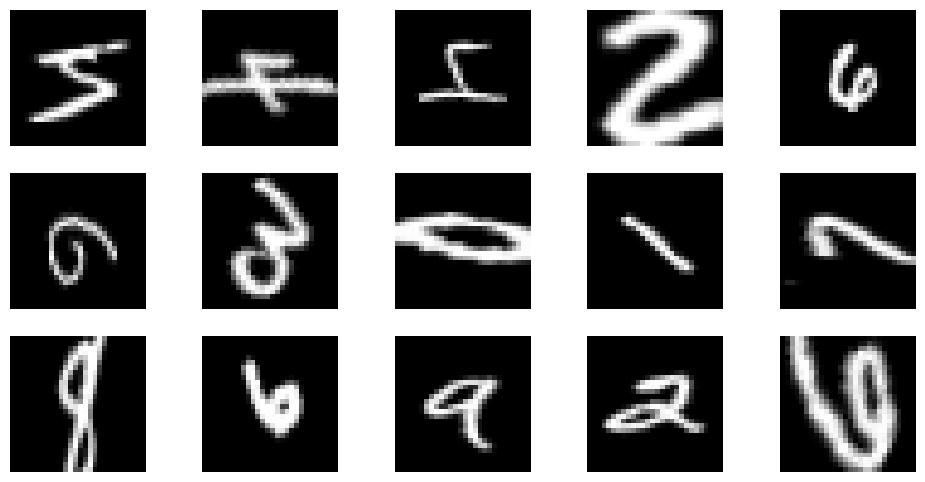

In [67]:
plt.figure(figsize = (12,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(augmented_image_batch[i].reshape(28,28) , cmap = "gray")
  plt.axis("off")
plt.show()

**width_shift_range** - Сдвиг по оси х . **Height_shift_range** - cдвиг по оси y.

In [68]:
data3_gen = ImageDataGenerator(width_shift_range = 0.2 , height_shift_range = 0.2 , rotation_range = 20 , zoom_range = 0.2)

In [69]:
data3_gen.fit(x_train_reshaped)

In [49]:
augmented_image3 = data3_gen.flow(x_train_reshaped[:64] , batch_size = 64)

In [70]:
augmented_image_batch3 = next(augmented_image3)

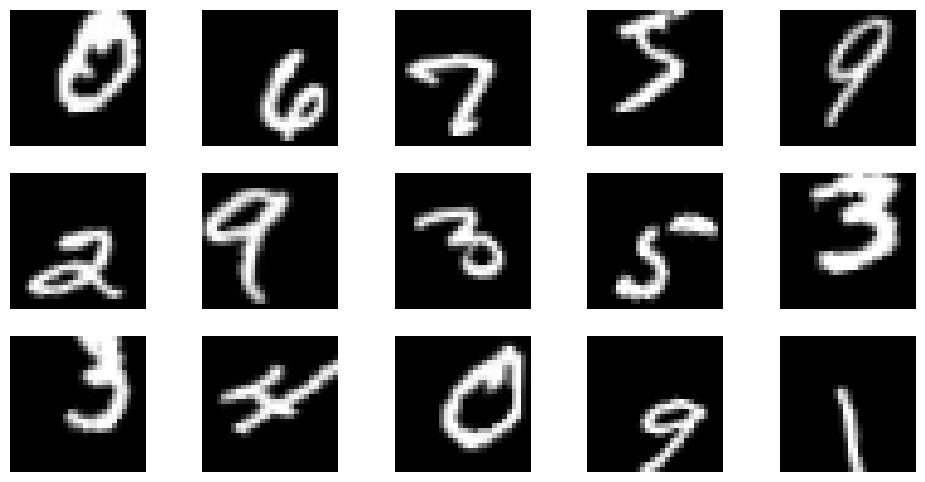

In [71]:
plt.figure(figsize = (12,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(augmented_image_batch3[i].reshape(28,28) , cmap = "gray")
  plt.axis("off")
plt.show()

**fill_mode** - Этот атрибут контролирует, как будет заполняться пространство, которое образуется после аугментации изображений (например, при вращении или сдвиге изображения).
**horizontal_flip** - Этот атрибут контролирует горизонтальный переворот изображения.
**shear_range** - Этот атрибут используется для создания сдвига (или наклона) изображения по горизонтали или вертикали, что делает изображение более искаженным и похожим на результат геометрического искажения.

In [76]:
data4_gen = ImageDataGenerator(fill_mode = "nearest" , horizontal_flip = True , shear_range = 0.5)

In [77]:
data4_gen.fit(x_train_reshaped[:64])

In [78]:
augmented_images4 = data4_gen.flow(x_train_reshaped[:64] , batch_size = 64)

In [79]:
augmented_images_batch4 = next(augmented_images4)

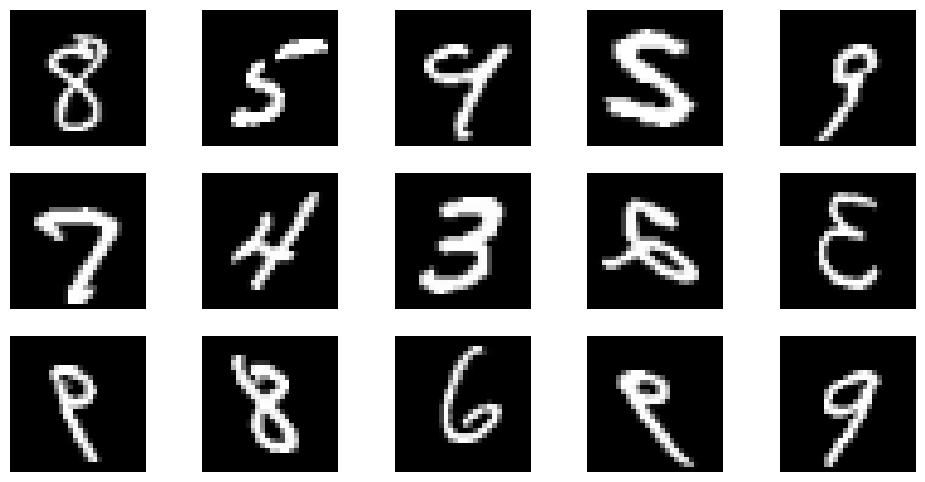

In [80]:
plt.figure(figsize = (12,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(augmented_images_batch4[i].reshape(28,28) , cmap = "gray")
  plt.axis("off")
plt.show()

**Тут мы затронули самые важные(по моему мнению) атрибуты ImageDataGenerator.**
**Может быть в будущем когда наберусь опыта обновлю этот ноутбук(но это не точно).**